## Creating 2 Predictive models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error, r2_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing , metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy.sparse import csr_matrix
import nltk
#!pip install tabpy

In [3]:
product_info = pd.read_csv('Datasets/product_info_clean.csv')

In [4]:
product_info.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'ingredients', 'price_usd',
       'value_price_usd', 'limited_edition', 'online_only',
       'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category'],
      dtype='object')

In [5]:
product_info.head(10)

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,ingredients,price_usd,value_price_usd,limited_edition,online_only,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,"['Capri Eau de Parfum:', 'Alcohol Denat. (SD A...",35.0,NaN,0,1,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,0,1,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,0,1,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,0,1,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,0,1,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume
5,P473661,Kasbah Eau de Parfum Travel Spray,6342,19-69,2448,4.4762,21.0,0.25 oz/ 7.5 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",30.0,NaN,0,1,0,"['Warm &Spicy Scent', 'Unisex/ Genderless Scen...",Fragrance,Women,Rollerballs & Travel Size
6,P473659,Purple Haze Eau de Parfum Travel Spray,6342,19-69,1619,3.2308,13.0,0.25 oz/ 7.5 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",30.0,NaN,0,1,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size
7,P473666,Invisible Post Eau de Parfum,6342,19-69,1542,3.6250,8.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,0,1,0,"['Unisex/ Genderless Scent', 'allure 2022 Best...",Fragrance,Women,Perfume
8,P472300,Capri Eau de Parfum,6342,19-69,1542,3.5714,7.0,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,NaN,0,1,0,"['Fresh Scent', 'Layerable Scent', 'Unisex/ Ge...",Fragrance,Women,Perfume
9,P473667,Invisible Post Eau de Parfum Travel Spray,6342,19-69,1377,3.6250,8.0,0.25 oz/ 7.5 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",30.0,NaN,0,1,0,"['Unisex/ Genderless Scent', 'allure 2022 Best...",Fragrance,Women,Rollerballs & Travel Size


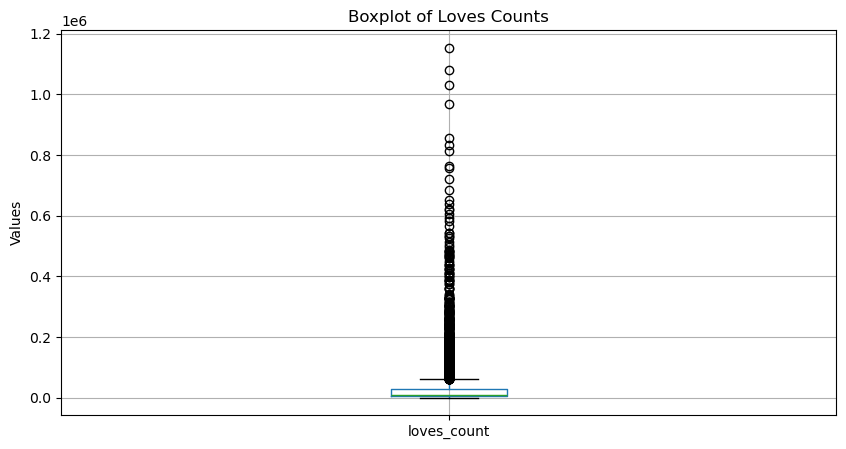

In [6]:
plt.figure(figsize=(10, 5))
product_info.boxplot(column =['loves_count'])
plt.title("Boxplot of Loves Counts")
plt.ylabel("Values")
plt.show()

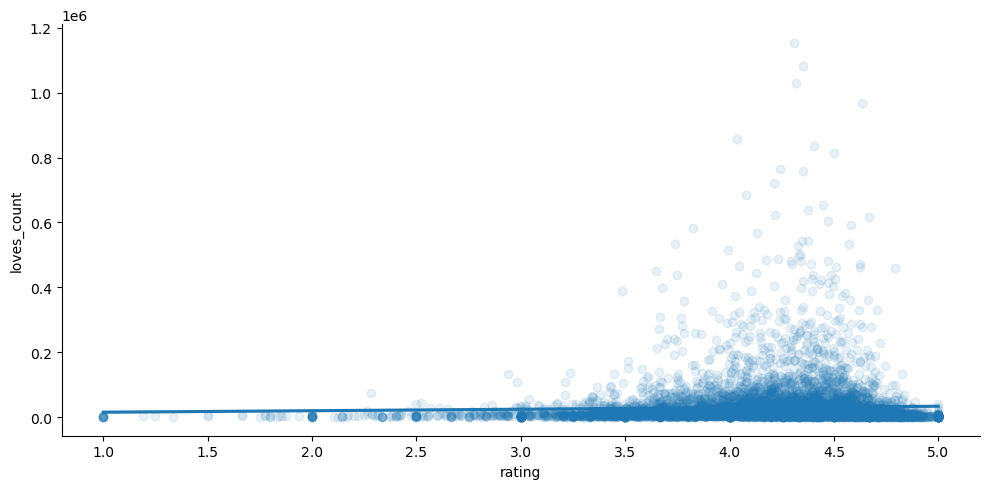

In [7]:
sns.lmplot(x='rating', y='loves_count', data=product_info, aspect=2, scatter_kws={'alpha':0.1});

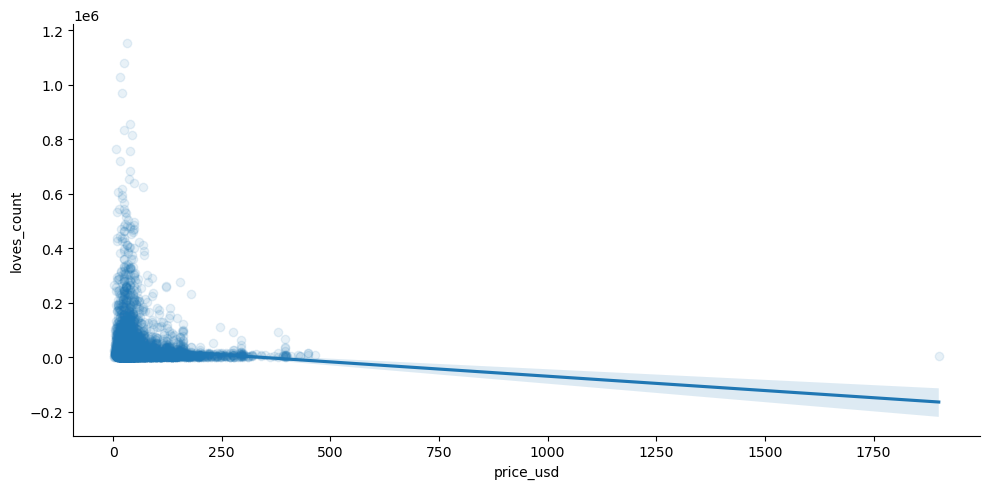

In [8]:
sns.lmplot(x='price_usd', y='loves_count', data=product_info, aspect=2, scatter_kws={'alpha':0.1});

In [9]:
num_col = product_info.describe(exclude = 'object')
num_col.columns

Index(['brand_id', 'loves_count', 'rating', 'reviews', 'price_usd',
       'value_price_usd', 'limited_edition', 'online_only',
       'sephora_exclusive'],
      dtype='object')

In [10]:
product_info.describe(include = 'object').columns


Index(['product_id', 'product_name', 'brand_name', 'size', 'ingredients',
       'highlights', 'primary_category', 'secondary_category',
       'tertiary_category'],
      dtype='object')

In [11]:
print (f'The number of nulls is {product_info.isnull().sum()}')
product_info.columns=[col.lower().replace(' ','_') for col in product_info.columns]
target= 'loves_count'
features =[]
for col in product_info:
    if col not in ['loves_count']:
        features.append(col)
num_features = ['brand_id', 'rating', 'reviews','price_usd','limited_edition', 'online_only']
cat_features = ['brand_name', 'ingredients',
       'highlights', 'primary_category', 'secondary_category']
for col in cat_features:
    print(col,product_info[col].nunique(),'\n')
    print(col,product_info[col].unique())

The number of nulls is product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                   0
reviews                  0
size                  1484
ingredients            874
price_usd                0
value_price_usd       7690
limited_edition          0
online_only              0
sephora_exclusive        0
highlights            2124
primary_category         0
secondary_category       0
tertiary_category      894
dtype: int64
brand_name 302 

brand_name ['19-69' '54 Thrones' 'ABBOTT' 'Acqua di Parma' 'adwoa beauty' 'AERIN'
 'Algenist' 'Alpha-H' 'alpyn beauty' 'ALTERNA Haircare' 'Ami Colé' 'amika'
 'Anastasia Beverly Hills' 'Aquis' 'Armani Beauty' 'Artist Couture'
 'Atelier Cologne' 'Augustinus Bader' 'Azzaro' 'bareMinerals' 'BeautyBio'
 'beautyblender' 'belif' 'Benefit Cosmetics' 'BERDOUES' 'Bio Ionic'
 'Biossance' 'Blinc' 'Bobbi Brown' 'Bon Parfumeur' 'BondiBoost'
 'Boy Smells' 'BREAD BEAUTY SU

In [12]:
product_info.dropna(axis = 0, subset=['size', 'ingredients' , 'value_price_usd', 'highlights', 'tertiary_category'], inplace = True)

In [13]:
product_info.isnull().sum()

product_id            0
product_name          0
brand_id              0
brand_name            0
loves_count           0
rating                0
reviews               0
size                  0
ingredients           0
price_usd             0
value_price_usd       0
limited_edition       0
online_only           0
sephora_exclusive     0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
dtype: int64

In [14]:
cat_features

['brand_name',
 'ingredients',
 'highlights',
 'primary_category',
 'secondary_category']

In [15]:
features

['product_id',
 'product_name',
 'brand_id',
 'brand_name',
 'rating',
 'reviews',
 'size',
 'ingredients',
 'price_usd',
 'value_price_usd',
 'limited_edition',
 'online_only',
 'sephora_exclusive',
 'highlights',
 'primary_category',
 'secondary_category',
 'tertiary_category']

In [16]:
num_features

['brand_id',
 'rating',
 'reviews',
 'price_usd',
 'limited_edition',
 'online_only']

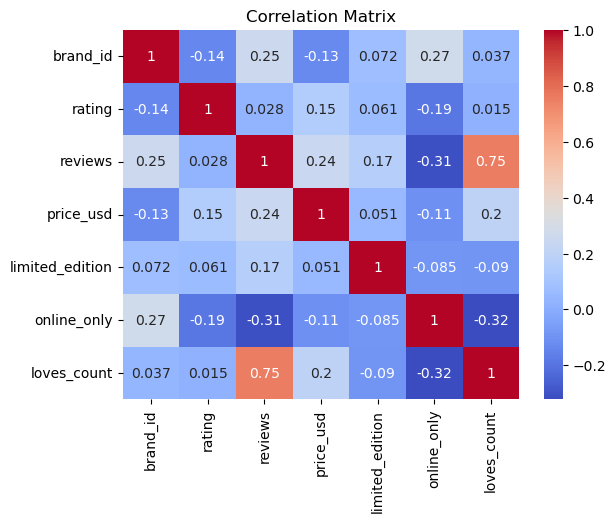

In [17]:
corr = product_info[['brand_id','rating','reviews','price_usd','limited_edition','online_only', 'loves_count']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [18]:
##Chosing Features for the Predictive Model

In [19]:
dummies=pd.get_dummies(product_info, columns=['brand_name','primary_category','secondary_category'],dtype=int,drop_first=True)

In [20]:
dummies.columns

Index(['product_id', 'product_name', 'brand_id', 'loves_count', 'rating',
       'reviews', 'size', 'ingredients', 'price_usd', 'value_price_usd',
       'limited_edition', 'online_only', 'sephora_exclusive', 'highlights',
       'tertiary_category', 'brand_name_Benefit Cosmetics',
       'brand_name_Biossance', 'brand_name_Bobbi Brown',
       'brand_name_Curlsmith', 'brand_name_Dermalogica',
       'brand_name_Dr. Dennis Gross Skincare', 'brand_name_Drybar',
       'brand_name_Ellis Brooklyn', 'brand_name_Estée Lauder',
       'brand_name_Farmacy', 'brand_name_GLO Science', 'brand_name_Hourglass',
       'brand_name_KORA Organics', 'brand_name_Kiehl's Since 1851',
       'brand_name_Laura Mercier', 'brand_name_MAKE UP FOR EVER',
       'brand_name_NuFACE', 'brand_name_Nécessaire', 'brand_name_Oribe',
       'brand_name_Smashbox', 'brand_name_Sunday Riley', 'brand_name_Versace',
       'brand_name_amika', 'brand_name_caliray', 'brand_name_stila',
       'primary_category_Fragrance', '

In [21]:
featuring = pd.concat([product_info.brand_id,product_info.rating, product_info.reviews, product_info.price_usd, 
                       product_info.limited_edition, product_info.online_only, dummies])

In [22]:
featuring = [col for col in dummies if col.startswith('brand_name_') or col.startswith('primary_category') or col.startswith('secondary_category')]

In [23]:
featuring.append('brand_id')

In [24]:
featuring.append('rating')

In [25]:
featuring.append('reviews')

In [26]:
featuring.append('price_usd')

In [27]:
featuring.append('limited_edition')

In [28]:
featuring.append('online_only')

In [29]:
featuring

['brand_name_Benefit Cosmetics',
 'brand_name_Biossance',
 'brand_name_Bobbi Brown',
 'brand_name_Curlsmith',
 'brand_name_Dermalogica',
 'brand_name_Dr. Dennis Gross Skincare',
 'brand_name_Drybar',
 'brand_name_Ellis Brooklyn',
 'brand_name_Estée Lauder',
 'brand_name_Farmacy',
 'brand_name_GLO Science',
 'brand_name_Hourglass',
 'brand_name_KORA Organics',
 "brand_name_Kiehl's Since 1851",
 'brand_name_Laura Mercier',
 'brand_name_MAKE UP FOR EVER',
 'brand_name_NuFACE',
 'brand_name_Nécessaire',
 'brand_name_Oribe',
 'brand_name_Smashbox',
 'brand_name_Sunday Riley',
 'brand_name_Versace',
 'brand_name_amika',
 'brand_name_caliray',
 'brand_name_stila',
 'primary_category_Fragrance',
 'primary_category_Hair',
 'primary_category_Makeup',
 'primary_category_Skincare',
 'primary_category_Tools & Brushes',
 'secondary_category_Beauty Tools',
 'secondary_category_Cleansers',
 'secondary_category_Eye',
 'secondary_category_Face',
 'secondary_category_Hair Styling & Treatments',
 'seconda

In [30]:
#Creating X_train,X_test,y_train and y_test variables

In [31]:
dummies.columns

Index(['product_id', 'product_name', 'brand_id', 'loves_count', 'rating',
       'reviews', 'size', 'ingredients', 'price_usd', 'value_price_usd',
       'limited_edition', 'online_only', 'sephora_exclusive', 'highlights',
       'tertiary_category', 'brand_name_Benefit Cosmetics',
       'brand_name_Biossance', 'brand_name_Bobbi Brown',
       'brand_name_Curlsmith', 'brand_name_Dermalogica',
       'brand_name_Dr. Dennis Gross Skincare', 'brand_name_Drybar',
       'brand_name_Ellis Brooklyn', 'brand_name_Estée Lauder',
       'brand_name_Farmacy', 'brand_name_GLO Science', 'brand_name_Hourglass',
       'brand_name_KORA Organics', 'brand_name_Kiehl's Since 1851',
       'brand_name_Laura Mercier', 'brand_name_MAKE UP FOR EVER',
       'brand_name_NuFACE', 'brand_name_Nécessaire', 'brand_name_Oribe',
       'brand_name_Smashbox', 'brand_name_Sunday Riley', 'brand_name_Versace',
       'brand_name_amika', 'brand_name_caliray', 'brand_name_stila',
       'primary_category_Fragrance', '

In [32]:
X = dummies[featuring]
y = dummies.loves_count
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=99)
lr= LinearRegression()
lr.fit(X_train,y_train)
preds=lr.predict(X_test)
def rmse_r2_function(feature_cols):
    num_col=[col for col in feature_cols if col in num_features]
    cat_col=[col for col in feature_cols if col in cat_features]
    if cat_col:
        dummies=pd.get_dummies(product_info[cat_col],dtype=int, prefix=['brand_name','primary_category','secondary_category'],drop_first=True)

        X=pd.concat([product_info[num_col],dummies],axis=1)
    else:
        X=mpg[num_col]
    
    y=product_info.loves_count
    lr=LinearRegression() #you can change this to diff model ex.Randomforest 
    X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=99)
    lr.fit(X_train,y_train)
    preds=lr.predict(X_test)
    RMSE=(mean_squared_error(y_test,preds))**(1/2)
    r2=r2_score(y_test,preds)
    return RMSE, r2

In [33]:
def rmse_r2_function(feature_cols, model):
    # Separate numeric and categorical features
    num_col = [col for col in feature_cols if col in num_features]
    cat_col = [col for col in feature_cols if col in cat_features]
    if cat_col:
        dummies = pd.get_dummies(
            product_info[cat_col],
            dtype=int,
            drop_first=True
        )
        X = pd.concat([product_info[num_col], dummies], axis=1)
    else:
        X = product_info[num_col]
    y = product_info.loves_count
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
    # Fit the model
    model.fit(X_train, y_train)
    # Make predictions
    preds = model.predict(X_test)
    # Evaluate RMSE and R^2
    RMSE = (mean_squared_error(y_test, preds))**(1/2)
    r2 = r2_score(y_test, preds)

    return RMSE, r2

In [34]:
rmse, r2 = rmse_r2_function(['brand_name', 'primary_category', 'secondary_category','price_usd'], lr)
print(f"LinearRegression - RMSE: {rmse}, R^2: {r2}")

LinearRegression - RMSE: 47998.59870419227, R^2: 0.5885973630115091


In [35]:
rf = RandomForestRegressor(random_state=99, n_estimators=100)
rmse, r2 = rmse_r2_function(['brand_name', 'primary_category', 'secondary_category'], rf)
print(f"Random Forest - RMSE: {rmse}, R^2: {r2}")

Random Forest - RMSE: 73843.8487193171, R^2: 0.026269885062064846


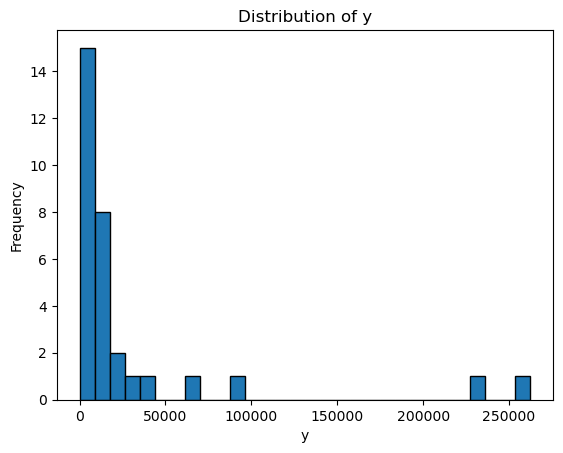

In [36]:
plt.hist(y, bins=30, edgecolor='k')
plt.title('Distribution of y')
plt.xlabel('y')
plt.ylabel('Frequency')
plt.show()


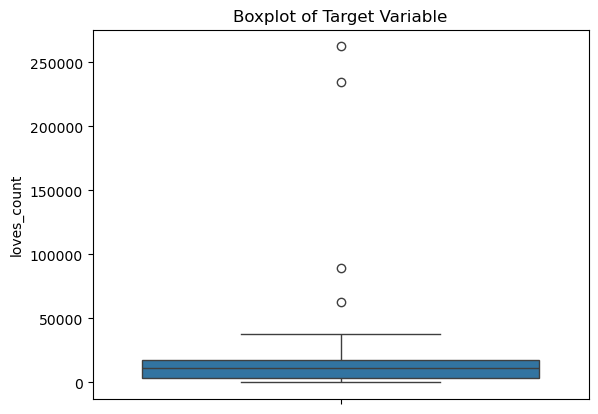

In [37]:

sns.boxplot(y)
plt.title("Boxplot of Target Variable")
plt.show()


In [38]:
#Findng ways to improve the model
# using log transformation to reduce impact of outliners
product_info['loves_count_log'] = np.log1p(product_info['loves_count'])
y = product_info['loves_count_log']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# linear Regression
lr.fit(X_train_scaled, y_train)

# Predictions
preds = lr.predict(X_test_scaled)

# Metrics
RMSE = (mean_squared_error(y_test, preds))**(1/2)
r2 = r2_score(y_test, preds)
print(f"Linear Regression - RMSE: {RMSE}, R^2: {r2}")


Linear Regression - RMSE: 4.234388883450005, R^2: -0.5617389791353573


## Sentiment Predictive model

In [41]:
reviews250 = pd.read_csv("Datasets/reviews_0-250.csv", dtype={'author_id': 'str'})
reviews250.drop(['Unnamed: 0','eye_color', 'hair_color', 'helpfulness',], axis = 1 , inplace = True )

In [42]:
reviews250.dropna(axis = 0, subset = ['review_text'], inplace = True)

In [43]:
reviews500 = pd.read_csv("Datasets/reviews_250-500.csv", dtype={'author_id': 'str'})
reviews500.drop(['Unnamed: 0','eye_color', 'hair_color', 'helpfulness',], axis = 1 , inplace = True )
reviews500.dropna(axis = 0, subset = ['review_text'], inplace = True)

In [44]:
reviews750 = pd.read_csv("Datasets/reviews_500-750.csv", dtype={'author_id': 'str'})
reviews750.drop(['Unnamed: 0','eye_color', 'hair_color', 'helpfulness'], axis = 1 , inplace = True )
reviews750.dropna(axis = 0, subset = ['review_text'], inplace = True)

In [45]:
reviews1250 = pd.read_csv("Datasets/reviews_750-1250.csv", dtype={'author_id': 'str'})
reviews1250.drop(['Unnamed: 0','eye_color', 'hair_color', 'helpfulness'], axis = 1 , inplace = True )
reviews1250.dropna(axis = 0, subset = ['review_text'], inplace = True)

In [46]:
reviews5000 = pd.read_csv("Datasets/reviews_1250-end.csv", dtype={'author_id': 'str'})
reviews5000.drop(['Unnamed: 0','eye_color', 'hair_color', 'helpfulness'], axis = 1 , inplace = True )
reviews5000.dropna(axis = 0, subset = ['review_text'], inplace = True)

In [47]:
reviews1 = reviews250.merge(reviews500, how= 'outer')
reviews2 = reviews1.merge(reviews750, how = 'outer')

In [48]:
reviews3 = reviews2.merge(reviews1250, how = 'outer')
reviews4 = reviews3.merge(reviews5000, how = 'outer')

In [49]:
reviews4['combined_text'] = reviews4['review_title'].fillna('') + ' ' + reviews4['review_text'].fillna('').astype(str)

In [50]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=2500)
X = vectorizer.fit_transform(reviews4['combined_text']).toarray()

In [104]:
sia = SentimentIntensityAnalyzer()

# Add sentiment scores to the dataset
reviews4['sentiment_score'] = reviews4['combined_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
reviews4['sentiment_label'] = reviews4['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [105]:
# Define sentiment values based on rating
def sentiment_alignment(row):
    if (row['rating'] >= 4 and row['sentiment_label'] == 'positive') or \
       (row['rating'] <= 2 and row['sentiment_label'] == 'negative'):
        return 'Aligned'
    elif row['rating'] == 3 and row['sentiment_label'] == 'neutral':
        return 'Aligned'
    else:
        return 'Misaligned'

reviews4['alignment'] = reviews4.apply(sentiment_alignment, axis=1)


In [109]:
# Model Training
y = reviews4['sentiment_label'] 
X = csr_matrix(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.75      0.51      0.61     17439
     neutral       0.78      0.56      0.65      3141
    positive       0.95      0.99      0.97    198014

    accuracy                           0.94    218594
   macro avg       0.83      0.68      0.74    218594
weighted avg       0.94      0.94      0.94    218594



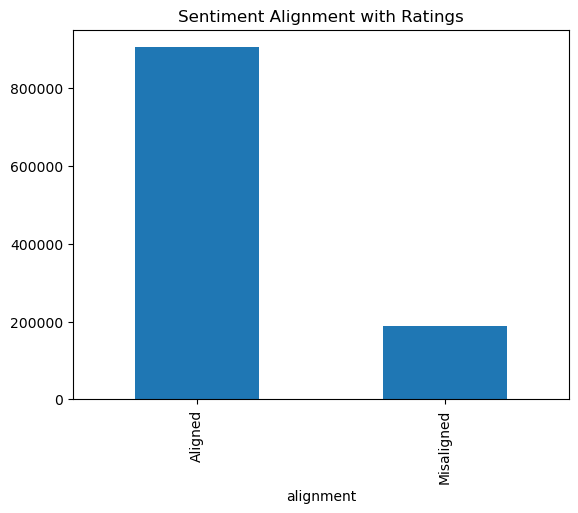

In [110]:
#Check if the predictions are aligned with the ratings
alignment_counts = reviews4['alignment'].value_counts()
alignment_counts.plot(kind='bar', title='Sentiment Alignment with Ratings')
plt.show();

In [113]:
reviews4.columns

Index(['author_id', 'rating', 'is_recommended', 'total_feedback_count',
       'total_neg_feedback_count', 'total_pos_feedback_count',
       'submission_time', 'review_text', 'review_title', 'skin_tone',
       'skin_type', 'product_id', 'product_name', 'brand_name', 'price_usd',
       'combined_text', 'sentiment_score', 'sentiment_label', 'alignment'],
      dtype='object')

In [123]:
predictions = reviews4[['author_id', 'product_id','sentiment_score', 'sentiment_label', 'alignment']]

In [124]:
predictions

,author_id,product_id,sentiment_score,sentiment_label,alignment
0,10000015049,P427417,-0.2960,negative,Misaligned
1,1000001620,P467115,0.9388,positive,Aligned
2,10000049623,P422003,0.9299,positive,Aligned
3,10000060335,P269122,0.8287,positive,Aligned
4,10000098796,P126301,0.9787,positive,Aligned
...,...,...,...,...,...
1092962,orderGen5563740,P251529,0.9139,positive,Aligned
1092963,orderGen5563740,P392608,0.9772,positive,Aligned
1092964,orderGen5563740,P456412,0.9652,positive,Aligned
1092965,orderGen703225,P42204,0.5815,positive,Aligned


In [127]:
predictions.to_csv('reviewsandpredictions.csv', index=False)